In [1]:
from arcgis import GIS
from arcgis.raster import *
from arcgis.geometry import *
%matplotlib inline
import pandas as pd
import numpy as np
gis = GIS(username="caw062_dsc170fa20", verify_cert=False) 

Enter password: ········


# Importing Data

1. (arcgis layer) First layer comes from testing locations in the United States. since we are only interested in testing sites within SD county, we will use find existing locations to create a layer from the original layer that has county == San Diego.
2. (Local shapefile from Sandorg) Census tract enriched with data, ethnicities (white population, black population, hispanic population, asian population, pacific islanders population, other population), total population, median income level, population over 65 years old. 
3. (arcgis layer) hospital points geometry layer in SD. 

<Item title:"GISCorps COVID-19 Testing Locations in the United States Symbolized by Status" type:Feature Layer Collection owner:htorpey_GC>
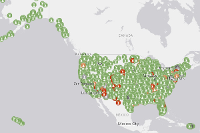

In [260]:

testing_sites = gis.content.get('11fe8f374c344549815a716c8472832f')
testing_sites

In [261]:
testing_layer = testing_sites.layers[0]

In [262]:
testing_sites_sdf = pd.DataFrame.spatial.from_layer(testing_layer)

In [310]:
testing_sites_sdf

,OBJECTID,facilityid,name,fulladdr,municipality,agency,agencytype,phone,agencyurl,operhours,...,vehicle_required,facility_type,Outside_FID,filter,minimum_age,Same_Day_Results,take_home_test,Wheelchair_Accessible,Accessibility_Support,SHAPE
0,2,None,"Legacy Community Health, Fifth Ward","3811 Lyons Ave., Houston, TX 77020",Houston,Legacy Community Health,Private,8325485400,https://www.legacycommunityhealth.org/,"M-F, 8am - 5pm",...,None,None,NaN,None,NaN,None,No,Unknown,None,"{""x"": -10612273.983, ""y"": 3474802.5209000036, ..."
1,7,None,United Memorial Medical Center - Tidwell,"510 W Tidwell Rd, Houston, TX, 77091",Houston,United Memorial Medical Center,Private,281-618-8500,https://www.ummcscreening.com/testing-locations,"M-F, 8 a.m. – 3 p.m.",...,Yes,Medical Center,NaN,None,NaN,No,No,Unknown,None,"{""x"": -10620787.9203, ""y"": 3484008.149099998, ..."
2,8,None,Legacy Bissonnett,"12667 Bissonnet St, Houston, TX, 77099",Houston,Legacy Community Health,Private,8325485000,https://www.legacycommunityhealth.org/,None,...,None,None,NaN,None,NaN,None,No,Unknown,None,"{""x"": -10642303.6618, ""y"": 3462171.8198999986,..."
3,11,None,Legacy Deer Park,"3430 Center., Deer Park, TX",Deer Park,Legacy Community Health,Private,281-628-2040,https://www.legacycommunityhealth.org/,"M-F, 8am - 5pm",...,None,None,NaN,None,NaN,None,No,Unknown,None,"{""x"": -10589092.1266, ""y"": 3462587.6445999965,..."
4,12,None,Legacy Branard,"401 Branard St., Houston, TX 77006",Houston,Legacy Community Health,Private,713-366-7444,https://www.legacycommunityhealth.org/,None,...,None,None,NaN,None,NaN,None,No,Unknown,None,"{""x"": -10618178.1424, ""y"": 3469722.2556999996,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32330,44744,None,Leman Middle School,"238 E. Hazel Street, West Chicago, IL",West Chicago,State of Illinois,State,None,https://westchicago.org/police/free-covid-19-t...,"Thursday, December 10, 2020, from 8:00 a.m. – ...",...,Yes,Mobile,NaN,None,NaN,No,No,Unknown,Unknown,"{""x"": -9818880.43578606, ""y"": 5142036.44922462..."
32331,44745,None,Leman Middle School,"238 E. Hazel Street, West Chicago, IL",West Chicago,State of Illinois,State,None,https://westchicago.org/police/free-covid-19-t...,"Saturday December 5, 2020, from 8:00 a.m. – 4:...",...,Yes,Mobile,NaN,None,NaN,No,No,Unknown,Unknown,"{""x"": -9818865.042258289, ""y"": 5142035.4539386..."
32332,44746,None,COVID-19 Walk-up Testing - Cuesa's Ferry Plaza...,"1 Ferry Building, San Francisco, CA, 94111, USA",San Francisco,Curative & CUESA,Public-Private Partnership,None,https://curative.com/sites/15716#9/37.7938/-12...,"9 am to 3 pm Thursday, December 10th",...,No,Mobile,NaN,None,NaN,No,No,Unknown,Unknown,"{""x"": -13624816.555720571, ""y"": 4550544.375209..."
32333,44747,None,COVID-19 Walk-up Testing - CUESA's Ferry Plaza...,"1 Ferry Building, San Francisco, CA, 94111, USA",San Francisco,Curative & CUESA,Public-Private Partnership,None,https://curative.com/sites/15716#9/37.7938/-12...,9 am to 3 pm December 17th,...,No,Mobile,NaN,None,NaN,No,No,Unknown,Unknown,"{""x"": -13624817.75004914, ""y"": 4550544.3752094..."


In [269]:
testing_sites_sdf.columns

Index(['OBJECTID', 'facilityid', 'name', 'fulladdr', 'municipality', 'agency',
       'agencytype', 'phone', 'agencyurl', 'operhours', 'comments',
       'Instructions', 'numvehicles', 'testcapacity', 'status', 'CreationDate',
       'EditDate', 'Vetted', 'drive_through', 'appt_only', 'referral_required',
       'services_offered_onsite', 'call_first', 'virtual_screening',
       'health_dept_url', 'State', 'GlobalID', 'data_source', 'county',
       'red_flag', 'vol_note', 'public_form', 'start_date', 'end_date',
       'type_of_test', 'test_processing', 'fine_print', 'vehicle_required',
       'facility_type', 'Outside_FID', 'filter', 'minimum_age',
       'Same_Day_Results', 'take_home_test', 'Wheelchair_Accessible',
       'Accessibility_Support', 'SHAPE'],
      dtype='object')

In [271]:
testing_sites_sdf.loc[testing_sites_sdf.county == "San Diego"]

,OBJECTID,facilityid,name,fulladdr,municipality,agency,agencytype,phone,agencyurl,operhours,...,vehicle_required,facility_type,Outside_FID,filter,minimum_age,Same_Day_Results,take_home_test,Wheelchair_Accessible,Accessibility_Support,SHAPE
1109,1708,None,San Diego County Public Health Laboratory,"3851 Rosecrans Street Suite 716, San Diego, CA...",San Diego,San Diego County Department of Public Health,County,619-692-8500,https://www.sandiegocounty.gov/hhsa/programs/p...,Monday - Friday 8 AM - 4 PM,...,None,Public Health Department,NaN,None,NaN,None,No,Unknown,Unknown,"{""x"": -13046842.1711, ""y"": 3862542.846199997, ..."
1114,1718,None,Drive-Thru Screening Station at SDCCU Stadium,"9449 Friars Rd, San Diego, CA 92108",San Diego,San Diego County Department of Public Health,County,(619) 692-8499,https://www.sandiegocounty.gov/content/sdc/hhs...,Monday - Saturday,...,None,Outdoor,NaN,None,NaN,None,No,Unknown,Unknown,"{""x"": -13037768.3779, ""y"": 3866356.7286000033,..."
1298,1996,None,Scripps Clinic Torrey Pines,"10710 North Torrey Pines Rd.La Jolla, CA 92037",San Diego,Scripps Health,Non Profit,888-261-8431,https://www.scripps.org/locations/scripps-clin...,Monday -Friday 7am -7pm; Saturday 8am-noon,...,None,Clinic,NaN,None,NaN,None,No,Unknown,Unknown,"{""x"": -13051343.7795, ""y"": 3881834.6008, ""spat..."
1575,2323,None,Perlman Clinic Del Mar,"12843 El Camino Real Suite 203, San Diego, CA ...",San Diego,Perlman Clinic,Private,858-558-0399,https://perlmanclinic.com/urgent-care-del-mar/,Monday - Friday: 8AM - 5 PM; Saturday: 8AM - 4...,...,None,Clinic,NaN,None,NaN,None,No,Unknown,Unknown,"{""x"": -13050488.9627, ""y"": 3888795.7251999974,..."
1590,2339,None,Perlman Clinic San Diego,"3900 Fifth Ave #110 San Diego, CA 92103",San Diego,Perlman Clinic,Private,858-554-1212,https://perlmanclinic.com/urgent-care-hillcrest/,Monday - Friday: 8 AM - 7 PM; Saturday: 8 AM -...,...,None,Clinic,NaN,None,NaN,None,No,Unknown,Unknown,"{""x"": -13042282.211557131, ""y"": 3862032.989200..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31638,44015,None,County Fire - Chicano Federation: Central Office,"3180 University Ave, San Diego, CA 92104",San Diego,San Diego County & Partners,County,None,https://www.sandiegocounty.gov/content/sdc/hhs...,"Dec 5, 9 AM - 3 PM",...,No,Mobile,NaN,None,NaN,No,No,Unknown,Unknown,"{""x"": -13038358.260732371, ""y"": 3862013.770200..."
31639,44016,None,County Fire - Richard Stringham Building,"451 Tecate Rd, Tecate, CA 91980",Tecate,None,County,None,https://www.sandiegocounty.gov/content/sdc/hhs...,"Dec 5, 9 AM - 3 PM",...,No,Mobile,NaN,None,NaN,No,No,Unknown,Unknown,"{""x"": -12983046.348161316, ""y"": 3839551.265526..."
31640,44017,None,St. Leo Mission Church,"936 Genevieve St, Solana Beach, CA 92075",Solana Beach,San Diego County & Partners,County,None,https://www.sandiegocounty.gov/content/sdc/hhs...,Saturdays: 8:30 AM - 3:30 PM,...,Yes,Outdoor,NaN,None,NaN,No,No,Unknown,Unknown,"{""x"": -13052982.786049496, ""y"": 3893931.151359..."
31679,44057,None,One Medical - Carlsbad,"7740 El Camino Real Suite F, Carlsbad, CA 92009",Carlsbad,"1Life Healthcare, Inc.",Private,None,https://www.onemedical.com/blog/live-well/covi...,By appointment only,...,No,Clinic,NaN,None,NaN,No,No,Unknown,Unknown,"{""x"": -13054094.1219, ""y"": 3906330.2924000025,..."


In [266]:
testing_sites_in_sd = arcgis.features.analysis.find_existing_locations(input_layers=[testing_layer],
                expressions=[{"operator":"","layer":0,"where":"county = 'San Diego'"}],
                               output_name='testing sites in SD_Caiwei')

In [311]:
testing_sites_in_sd = gis.content.search(query = "testing sites in SD_Caiwei")[0]

<Item title:"testing sites in SD_Caiwei" type:Feature Layer Collection owner:caw062_dsc170fa20>
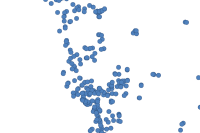

In [312]:
testing_sites_in_sd

In [270]:
# For some reason my map is not displaying correctly on here. 
map1 = gis.map('San Diego, CA', zoomlevel = 8)
map1.legend = True
map1.add_layer(testing_sites_in_sd)
map1


MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [191]:
import os
import numpy as np
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

/home/caw062/.local/lib/python3.7/site-packages/geopandas/_compat.py:87: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [192]:
shpFileIn = "./data/census/CENSUS_TRACTS_2010.shp"
sd_census_tract_boundary = gpd.read_file(shpFileIn)

In [193]:
census_tract_sdf = arcgis.features.GeoAccessor.from_geodataframe(sd_census_tract_boundary, inplace=True, column_name='SHAPE')

In [194]:
census_tracts_featureset = census_tract_sdf.spatial.to_featurelayer(title = "census tracts san diego")

In [195]:
census_tracts_feature_lyr = census_tracts_featureset

In [196]:
tract_enriched = arcgis.enrich_layer(census_tracts_feature_lyr,
                                  analysis_variables=["Policy.WHITE_CY","Policy.BLACK_CY","Policy.AMERIND_CY",
                                                      "Policy.ASIAN_CY","Policy.PACIFIC_CY","Policy.OTHRACE_CY",
                                                      "Policy.HISPPOP_CY",
                                                     "AtRisk.SENIORS_CY","KeyUSFacts.TOTPOP_FY",
                                                      "AtRisk.AVGHINC_CY"],
                                  output_name='Census Tracts Enriched With Ethnicity Adding Hispanic')

{"messageCode": "AO_100047", "message": "Enrichment may not be available for some features."}
{"messageCode": "AO_100000", "message": "Country aggregation mode supports only global data collections. Following data collections couldn't be processed: 'Policy', 'AtRisk', 'KeyUSFacts'."}


In [197]:
tract_enriched = gis.content.search(query = "Census Tracts Enriched With Ethnicity Adding Hispanic")[0]
tract_enriched

<Item title:"Census Tracts Enriched With Ethnicity Adding Hispanic" type:Feature Layer Collection owner:caw062_dsc170fa20>

In [218]:
tract_sdf = tract_enriched.layers[0].query().sdf

In [145]:
from arcgis.features import FeatureLayer
fs_url= "https://services7.arcgis.com/LXCny1HyhQCUSueu/arcgis/rest/services/Definitive_Healthcare_USA_Hospital_Beds/FeatureServer/0/"
icu_info = FeatureLayer(fs_url)

In [148]:
hospitals_in_sd = arcgis.features.analysis.find_existing_locations(input_layers=[icu_info],
                expressions=[{"operator":"","layer":0,"where":"COUNTY_NAME = 'San Diego'"}],
                               output_name='hospitals sites in SD_Caiwei')

In [14]:
hospitals_in_sd = gis.content.search("hospitals sites in SD_Caiwei")[0]
hospitals_in_sd

<Item title:"hospitals sites in SD_Caiwei" type:Feature Layer Collection owner:caw062_dsc170fa20>

In [17]:
hospitals_in_sd.layers[0].query().sdf.columns

Index(['OBJECTID', 'HOSPITAL_NAME', 'HOSPITAL_TYPE', 'HQ_ADDRESS',
       'HQ_ADDRESS1', 'HQ_CITY', 'HQ_STATE', 'HQ_ZIP_CODE', 'COUNTY_NAME',
       'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'NUM_LICENSED_BEDS',
       'NUM_STAFFED_BEDS', 'NUM_ICU_BEDS', 'ADULT_ICU_BEDS', 'PEDI_ICU_BEDS',
       'BED_UTILIZATION', 'Potential_Increase_In_Bed_Capac',
       'AVG_VENTILATOR_USAGE', 'SHAPE'],
      dtype='object')

# Data transformation and Joining
## Join Operation
1. Use join to get how many hospital beds each tract have within 5 miles radius.
2. Use join to get how many testing sites each tract have within 5 miles radius. 
## Aggregate_points
1. Use aggregate points to aggregate number of hospital beds within each tract
    
2. Use aggregate points to aggregate number of test sites within each tract
## Merge Table
merge the two table based on tract id, now we have a single table containing all the information

## Calculate testing sites and hospital beds ratio
- Number of hospital beds per person, number of hospital beds per sq ft of area
- Number of test sites per person, number of test sites per sq ft of area

In [ ]:
within_5_miles = arcgis.features.analysis.join_features(target_layer = tract_enriched.layers[0],
                                      join_layer = hospitals_in_sd.layers[0],
                                      spatial_relationship = "withindistance",
                                      spatial_relationship_distance = 1,
                                      spatial_relationship_distance_units = "miles",
                                      join_operation = "JoinOneToMany",
                                      summary_fields = [{"statisticType": "Sum", "onStatisticField": "NUM_STAFFED_BEDS"}],
                                                        output_name = "Within 1 miles of hospital beds CW"
                                                       )

In [275]:
within_5_miles_beds_sdf = within_5_miles.layers[0].query().sdf

In [276]:
within_5_miles_beds_sdf.columns

Index(['OBJECTID', 'Join_Count', 'TARGET_FID', 'JOIN_FID', 'TRACT', 'ID',
       'sourceCountry', 'ENRICH_FID', 'aggregationMethod',
       'populationToPolygonSizeRating', 'apportionmentConfidence', 'HasData',
       'WHITE_CY', 'BLACK_CY', 'AMERIND_CY', 'ASIAN_CY', 'PACIFIC_CY',
       'OTHRACE_CY', 'HISPPOP_CY', 'AVGHINC_CY', 'SENIORS_CY', 'TOTPOP_FY',
       'HOSPITAL_NAME', 'HOSPITAL_TYPE', 'HQ_ADDRESS', 'HQ_ADDRESS1',
       'HQ_CITY', 'HQ_STATE', 'HQ_ZIP_CODE', 'COUNTY_NAME', 'STATE_NAME',
       'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'NUM_LICENSED_BEDS',
       'NUM_STAFFED_BEDS', 'NUM_ICU_BEDS', 'ADULT_ICU_BEDS', 'PEDI_ICU_BEDS',
       'BED_UTILIZATION', 'Potential_Increase_In_Bed_Capac',
       'AVG_VENTILATOR_USAGE', 'SHAPE'],
      dtype='object')

In [277]:
num_icu_beds_by_tract = within_5_miles_beds_sdf.groupby("TRACT").agg({"NUM_STAFFED_BEDS":"sum"})
#within_5_miles_sdf.TRACT.nunique()
num_icu_beds_by_tract

,NUM_STAFFED_BEDS
TRACT,
1.00,415
2.01,978
2.02,978
3.00,978
4.00,1048
...,...
206.02,286
207.05,286
216.00,59


In [314]:
#testing_sites_in_sd
within_5_miles_testsites = arcgis.features.analysis.join_features(target_layer = tract_enriched.layers[0],
                                      join_layer = testing_sites_in_sd.layers[0],
                                      spatial_relationship = "withindistance",
                                      spatial_relationship_distance = 1,
                                      spatial_relationship_distance_units = "miles",
                                      join_operation = "JoinOneToMany",output_name = "Within 1 miles of test sites Adding Hispanic CW2"
                                                       )


In [315]:
within_5_miles_testsites_sdf = within_5_miles_testsites.layers[0].query().sdf
within_5_miles_testsites_sdf.columns

Index(['OBJECTID', 'Join_Count', 'TARGET_FID', 'JOIN_FID', 'TRACT', 'ID',
       'sourceCountry', 'ENRICH_FID', 'aggregationMethod',
       'populationToPolygonSizeRating', 'apportionmentConfidence', 'HasData',
       'WHITE_CY', 'BLACK_CY', 'AMERIND_CY', 'ASIAN_CY', 'PACIFIC_CY',
       'OTHRACE_CY', 'HISPPOP_CY', 'AVGHINC_CY', 'SENIORS_CY', 'TOTPOP_FY',
       'facilityid', 'name', 'fulladdr', 'municipality', 'agency',
       'agencytype', 'phone', 'agencyurl', 'operhours', 'comments',
       'Instructions', 'numvehicles', 'testcapacity', 'status', 'CreationDate',
       'EditDate', 'Vetted', 'drive_through', 'appt_only', 'referral_required',
       'services_offered_onsite', 'call_first', 'virtual_screening',
       'health_dept_url', 'State', 'GlobalID', 'data_source', 'county',
       'red_flag', 'vol_note', 'public_form', 'start_date', 'end_date',
       'type_of_test', 'test_processing', 'fine_print', 'vehicle_required',
       'facility_type', 'Outside_FID', 'filter', 'minimum_

In [316]:
num_testsites_by_tract = within_5_miles_testsites_sdf.groupby("TRACT").agg({"Join_Count":"sum"})
num_testsites_by_tract

,Join_Count
TRACT,
1.00,4
2.01,5
2.02,7
3.00,7
4.00,6
...,...
214.00,2
215.00,2
219.00,9


In [317]:
tract_sdf.columns

Index(['OBJECTID', 'TRACT', 'Shape__Area', 'Shape__Length', 'ID',
       'sourceCountry', 'ENRICH_FID', 'aggregationMethod',
       'populationToPolygonSizeRating', 'apportionmentConfidence', 'HasData',
       'WHITE_CY', 'BLACK_CY', 'AMERIND_CY', 'ASIAN_CY', 'PACIFIC_CY',
       'OTHRACE_CY', 'HISPPOP_CY', 'AVGHINC_CY', 'SENIORS_CY', 'TOTPOP_FY',
       'SHAPE'],
      dtype='object')

In [318]:
#tract_sdf = tract_sdf.set_index("TRACT")
len(tract_sdf)

627

In [319]:
tract_sdf_with_testsites = tract_sdf.join(num_testsites_by_tract,on="TRACT",how="left")

In [320]:
tract_sdf_with_testsites_and_beds = tract_sdf_with_testsites.join(num_icu_beds_by_tract,on="TRACT",how="left")
tract_sdf_with_testsites_and_beds = tract_sdf_with_testsites_and_beds.rename({"Join_Count":"NUM_TESTSITES"},axis=1)

In [321]:
tract_sdf_with_testsites_and_beds["NUM_STAFFED_BEDS"] = tract_sdf_with_testsites_and_beds["NUM_STAFFED_BEDS"].fillna(0)
tract_sdf_with_testsites_and_beds["NUM_TESTSITES"] = tract_sdf_with_testsites_and_beds["NUM_TESTSITES"].fillna(0)


# Analysis
## Create a single dataframe that has all the values we want to find correlation
## create a index score, as the covid-19 risk maximum 5
## Find correlation between ethnicity and covid-19 risk
1. non-white vs risk
2. income level vs risk
3. hispanic & black population ratio vs risk
4. 

In [322]:
#Creating new columns as ratios of testing sites by area size and population
testing_site_num_population_ratio = 1 - tract_sdf_with_testsites_and_beds.NUM_TESTSITES / (tract_sdf_with_testsites_and_beds.TOTPOP_FY)/1000
testing_site_num_area_ratio =1 - tract_sdf_with_testsites_and_beds.NUM_TESTSITES / (tract_sdf_with_testsites_and_beds.Shape__Area*3.58701e-8)

#Creating new columns as ratios of num of hospital beds by area size and population

number_beds = tract_sdf_with_testsites_and_beds["NUM_STAFFED_BEDS"].fillna(0) #only count the number of staffed beds 
hospital_beds_num_population_ratio = 1 - number_beds/(tract_sdf_with_testsites_and_beds.TOTPOP_FY / 1000)
hospital_beds_num_area_ratio = 1 - number_beds / (tract_sdf_with_testsites_and_beds.Shape__Area*3.58701e-8)


In [323]:
tract_sdf_with_testsites_and_beds = tract_sdf_with_testsites_and_beds.loc[~tract_sdf_with_testsites_and_beds.TOTPOP_FY.isna()]

tract_sdf_with_testsites_and_beds["testing_site_num_population_ratio"] = testing_site_num_population_ratio
tract_sdf_with_testsites_and_beds["testing_site_num_area_ratio"] = testing_site_num_area_ratio

tract_sdf_with_testsites_and_beds["hospital_beds_num_population_ratio"] = hospital_beds_num_population_ratio
tract_sdf_with_testsites_and_beds["hospital_beds_num_area_ratio"] = hospital_beds_num_area_ratio


In [324]:
total_population = tract_sdf_with_testsites_and_beds['TOTPOP_FY'].fillna(0)
population_density = total_population/tract_sdf_with_testsites_and_beds.Shape__Area
tract_sdf_with_testsites_and_beds['population_density'] = population_density

In [325]:
len(tract_sdf_with_testsites_and_beds) #After removing rows with null as population density 


621

In [326]:
tract_sdf_with_testsites_and_beds.columns

Index(['OBJECTID', 'TRACT', 'Shape__Area', 'Shape__Length', 'ID',
       'sourceCountry', 'ENRICH_FID', 'aggregationMethod',
       'populationToPolygonSizeRating', 'apportionmentConfidence', 'HasData',
       'WHITE_CY', 'BLACK_CY', 'AMERIND_CY', 'ASIAN_CY', 'PACIFIC_CY',
       'OTHRACE_CY', 'HISPPOP_CY', 'AVGHINC_CY', 'SENIORS_CY', 'TOTPOP_FY',
       'SHAPE', 'NUM_TESTSITES', 'NUM_STAFFED_BEDS',
       'testing_site_num_population_ratio', 'testing_site_num_area_ratio',
       'hospital_beds_num_population_ratio', 'hospital_beds_num_area_ratio',
       'population_density'],
      dtype='object')

In [358]:
tract_sdf_with_testsites_and_beds["POC_percentage"] = 1 - tract_sdf_with_testsites_and_beds["WHITE_CY"]/tract_sdf_with_testsites_and_beds["TOTPOP_FY"]
tract_sdf_with_testsites_and_beds["Hispanic_Black_Percentage"] = (tract_sdf_with_testsites_and_beds["HISPPOP_CY"] + tract_sdf_with_testsites_and_beds["BLACK_CY"])/tract_sdf_with_testsites_and_beds["TOTPOP_FY"]

In [328]:
from sklearn import preprocessing

In [359]:
X_train = tract_sdf_with_testsites_and_beds[ ['population_density',
                                             "hospital_beds_num_area_ratio",
                                             "hospital_beds_num_population_ratio",
                                             "testing_site_num_area_ratio",
                                             "testing_site_num_population_ratio",
                                             "SENIORS_CY","POC_percentage","AVGHINC_CY","Hispanic_Black_Percentage"
                                            ]]

In [360]:
scaler = preprocessing.MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)


In [331]:
import matplotlib.pyplot as plt



In [361]:
df = pd.DataFrame(X_train_minmax,columns = ['population_density',
                                             "hospital_beds_num_area_ratio",
                                             "hospital_beds_num_population_ratio",
                                             "testing_site_num_area_ratio",
                                             "testing_site_num_population_ratio",
                                             "SENIORS_CY","POC_percentage","AVGHINC_CY","Hispanic_Black_Percentage"
                                            ])
df.population_density.mean()

0.12352965789300119

In [362]:
df["overall_risk_score"] = df.population_density + df.hospital_beds_num_area_ratio/2 + df.hospital_beds_num_population_ratio/2 + df.testing_site_num_area_ratio/2 + df.testing_site_num_population_ratio/2 +df.SENIORS_CY
df["overall_risk_score"]

0      1.905122
1      2.497250
2      1.830427
3      2.128890
4      1.911706
         ...   
616    2.020206
617    2.326629
618    2.170779
619    2.303381
620    2.545768
Name: overall_risk_score, Length: 621, dtype: float64

In [334]:
tract_sdf_with_testsites_and_beds = tract_sdf_with_testsites_and_beds.reset_index()

In [349]:
tract_sdf_with_testsites_and_beds.columns

Index(['index', 'OBJECTID', 'TRACT', 'Shape__Area', 'Shape__Length', 'ID',
       'sourceCountry', 'ENRICH_FID', 'aggregationMethod',
       'populationToPolygonSizeRating', 'apportionmentConfidence', 'HasData',
       'WHITE_CY', 'BLACK_CY', 'AMERIND_CY', 'ASIAN_CY', 'PACIFIC_CY',
       'OTHRACE_CY', 'HISPPOP_CY', 'AVGHINC_CY', 'SENIORS_CY', 'TOTPOP_FY',
       'SHAPE', 'NUM_TESTSITES', 'NUM_STAFFED_BEDS',
       'testing_site_num_population_ratio', 'testing_site_num_area_ratio',
       'hospital_beds_num_population_ratio', 'hospital_beds_num_area_ratio',
       'population_density', 'POC_percentage', 'Hispanic_Black_Percentage',
       'overall_risk', 'Mipopulation_density', 'MMSENIORS_CY'],
      dtype='object')

In [350]:
tract_sdf_with_testsites_and_beds["overall_risk"] = df["overall_risk_score"]
tract_sdf_with_testsites_and_beds["Mipopulation_density"] = tract_sdf_with_testsites_and_beds["population_density"] * 1e6
tract_sdf_with_testsites_and_beds["MMSENIORS_CY"] = df["SENIORS_CY"]
tract_sdf_with_testsites_and_beds["testing_site_num_population_ratio"] = df["testing_site_num_population_ratio"]

tract_sdf_with_testsites_and_beds["testing_site_num_area_ratio"] = df["testing_site_num_area_ratio"]

tract_sdf_with_testsites_and_beds["hospital_beds_num_area_ratio"] = df["hospital_beds_num_area_ratio"]
tract_sdf_with_testsites_and_beds["hospital_beds_num_population_ratio"] = df["hospital_beds_num_population_ratio"]



In [363]:
tract_sdf_with_testsites_and_beds_lyr = tract_sdf_with_testsites_and_beds.spatial.to_featurelayer(title = "Tract with Risk Score Changed MinMax")

In [364]:
tract_sdf_with_testsites_and_beds_lyr

<Item title:"Tract with Risk Score Changed MinMax" type:Feature Layer Collection owner:caw062_dsc170fa20>

In [365]:
tract_sdf_with_testsites_and_beds.columns

Index(['index', 'OBJECTID', 'TRACT', 'Shape__Area', 'Shape__Length', 'ID',
       'sourceCountry', 'ENRICH_FID', 'aggregationMethod',
       'populationToPolygonSizeRating', 'apportionmentConfidence', 'HasData',
       'WHITE_CY', 'BLACK_CY', 'AMERIND_CY', 'ASIAN_CY', 'PACIFIC_CY',
       'OTHRACE_CY', 'HISPPOP_CY', 'AVGHINC_CY', 'SENIORS_CY', 'TOTPOP_FY',
       'SHAPE', 'NUM_TESTSITES', 'NUM_STAFFED_BEDS',
       'testing_site_num_population_ratio', 'testing_site_num_area_ratio',
       'hospital_beds_num_population_ratio', 'hospital_beds_num_area_ratio',
       'population_density', 'POC_percentage', 'Hispanic_Black_Percentage',
       'overall_risk', 'Mipopulation_density', 'MMSENIORS_CY'],
      dtype='object')

In [366]:
display(df[["overall_risk_score","POC_percentage"]].corr())
display(df[["overall_risk_score","Hispanic_Black_Percentage"]].corr())
display(df[["overall_risk_score","AVGHINC_CY"]].corr())


,overall_risk_score,POC_percentage
overall_risk_score,1.000000,-0.106743
POC_percentage,-0.106743,1.000000


,overall_risk_score,Hispanic_Black_Percentage
overall_risk_score,1.000000,-0.149607
Hispanic_Black_Percentage,-0.149607,1.000000


,overall_risk_score,AVGHINC_CY
overall_risk_score,1.000000,0.235681
AVGHINC_CY,0.235681,1.000000


In [367]:
display(df[["testing_site_num_population_ratio","POC_percentage"]].corr())
display(df[["testing_site_num_population_ratio","Hispanic_Black_Percentage"]].corr())
display(df[["testing_site_num_population_ratio","AVGHINC_CY"]].corr())


,testing_site_num_population_ratio,POC_percentage
testing_site_num_population_ratio,1.000000,0.087064
POC_percentage,0.087064,1.000000


,testing_site_num_population_ratio,Hispanic_Black_Percentage
testing_site_num_population_ratio,1.000000,0.062153
Hispanic_Black_Percentage,0.062153,1.000000


,testing_site_num_population_ratio,AVGHINC_CY
testing_site_num_population_ratio,1.00000,0.09621
AVGHINC_CY,0.09621,1.00000


In [368]:
display(df[["SENIORS_CY","POC_percentage"]].corr())
display(df[["SENIORS_CY","Hispanic_Black_Percentage"]].corr())
display(df[["SENIORS_CY","population_density"]].corr())


,SENIORS_CY,POC_percentage
SENIORS_CY,1.000000,-0.306463
POC_percentage,-0.306463,1.000000


,SENIORS_CY,Hispanic_Black_Percentage
SENIORS_CY,1.000000,-0.339037
Hispanic_Black_Percentage,-0.339037,1.000000


,SENIORS_CY,population_density
SENIORS_CY,1.000000,-0.334325
population_density,-0.334325,1.000000


In [356]:
display(df[["hospital_beds_num_area_ratio","POC_percentage"]].corr())
display(df[["hospital_beds_num_area_ratio","Hispanic_Black_Percentage"]].corr())
display(df[["hospital_beds_num_area_ratio","AVGHINC_CY"]].corr())
display(df[["hospital_beds_num_area_ratio","population_density"]].corr())


,hospital_beds_num_area_ratio,POC_percentage
hospital_beds_num_area_ratio,1.00000,-0.04387
POC_percentage,-0.04387,1.00000


,hospital_beds_num_area_ratio,Hispanic_Black_Percentage
hospital_beds_num_area_ratio,1.000000,0.082902
Hispanic_Black_Percentage,0.082902,1.000000


,hospital_beds_num_area_ratio,AVGHINC_CY
hospital_beds_num_area_ratio,1.000000,0.101828
AVGHINC_CY,0.101828,1.000000


,hospital_beds_num_area_ratio,population_density
hospital_beds_num_area_ratio,1.000000,-0.298342
population_density,-0.298342,1.000000


In [357]:
display(df[["population_density","POC_percentage"]].corr())
display(df[["population_density","Hispanic_Black_Percentage"]].corr())
display(df[["population_density","AVGHINC_CY"]].corr())


,population_density,POC_percentage
population_density,1.000000,0.441246
POC_percentage,0.441246,1.000000


,population_density,Hispanic_Black_Percentage
population_density,1.000000,0.268998
Hispanic_Black_Percentage,0.268998,1.000000


,population_density,AVGHINC_CY
population_density,1.000000,-0.489063
AVGHINC_CY,-0.489063,1.000000


In [374]:
tract_sdf_with_testsites_and_beds["POC_neighborhood"] = tract_sdf_with_testsites_and_beds.POC_percentage > 0.5
tract_sdf_with_testsites_and_beds["HB_neighborhood"] = tract_sdf_with_testsites_and_beds.Hispanic_Black_Percentage > 0.5

In [378]:
print(tract_sdf_with_testsites_and_beds.loc[tract_sdf_with_testsites_and_beds["POC_neighborhood"]].overall_risk.mean())
print(tract_sdf_with_testsites_and_beds.loc[~tract_sdf_with_testsites_and_beds["POC_neighborhood"]].overall_risk.mean())

2.282952792917276
2.3127321732753754


In [379]:
print(tract_sdf_with_testsites_and_beds.loc[tract_sdf_with_testsites_and_beds["HB_neighborhood"]].overall_risk.mean())
print(tract_sdf_with_testsites_and_beds.loc[~tract_sdf_with_testsites_and_beds["HB_neighborhood"]].overall_risk.mean())

2.278176091403167
2.3174799749054973


In [370]:
tract_sdf_with_testsites_and_beds.columns

Index(['index', 'OBJECTID', 'TRACT', 'Shape__Area', 'Shape__Length', 'ID',
       'sourceCountry', 'ENRICH_FID', 'aggregationMethod',
       'populationToPolygonSizeRating', 'apportionmentConfidence', 'HasData',
       'WHITE_CY', 'BLACK_CY', 'AMERIND_CY', 'ASIAN_CY', 'PACIFIC_CY',
       'OTHRACE_CY', 'HISPPOP_CY', 'AVGHINC_CY', 'SENIORS_CY', 'TOTPOP_FY',
       'SHAPE', 'NUM_TESTSITES', 'NUM_STAFFED_BEDS',
       'testing_site_num_population_ratio', 'testing_site_num_area_ratio',
       'hospital_beds_num_population_ratio', 'hospital_beds_num_area_ratio',
       'population_density', 'POC_percentage', 'Hispanic_Black_Percentage',
       'overall_risk', 'Mipopulation_density', 'MMSENIORS_CY'],
      dtype='object')

In [ ]:
tract_sdf_with_testsites_and_beds["BlackOrHispanic"] = (tract_sdf_with_testsites_and_beds["BLACK_CY"] + 
                                                        tract_sdf_with_testsites_and_beds["BLACK_CY"])/tract_sdf_with_testsites_and_beds["TOTPOP_FY"]

In [187]:
agg_hospitals_by_tract = arcgis.aggregate_points(point_layer=hospitals_in_sd.layers[0],
                        polygon_layer=tract_enriched.layers[0],
                        keep_boundaries_with_no_points=True,
                        summary_fields=["NUM_LICENSED_BEDS Sum","NUM_STAFFED_BEDS Sum",
                                       "NUM_ICU_BEDS Sum"],
                        output_name="Aggregated Hospitals Info Based on Tract Geometry2 CW")

# Data transformation and Joining
##
## Aggregate_points
1. Use aggregate points to aggregate number of hospital beds within each tract
    
2. Use aggregate points to aggregate number of test sites within each tract
## Merge Table
merge the two table based on tract id, now we have a single table containing all the information

## Calculate testing sites and hospital beds ratio
- Number of hospital beds per person, number of hospital beds per sq ft of area
- Number of test sites per person, number of test sites per sq ft of area

In [159]:
agg_hospitals_by_tract

<Item title:"Aggregated Hospitals Info Based on Tract Geometry CW" type:Feature Layer Collection owner:caw062_dsc170fa20>

In [226]:
agg_hospitals_by_tract_sdf = agg_hospitals_by_tract.layers[0].query().sdf
agg_hospitals_by_tract_sdf.head()

,OBJECTID,Point_Count,TRACT,Shape__Area,Shape__Length,ID,sourceCountry,ENRICH_FID,aggregationMethod,populationToPolygonSizeRating,...,PACIFIC_CY,OTHRACE_CY,AVGHINC_CY,SENIORS_CY,TOTPOP_FY,SUM_NUM_LICENSED_BEDS,SUM_NUM_STAFFED_BEDS,SUM_NUM_ICU_BEDS,AnalysisArea,SHAPE
0,1,0,100.09,5.706507e+06,11624.940443,None,None,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.561156,"{""rings"": [[[-13030762.9732, 3834409.4041], [-..."
1,2,0,101.09,1.825573e+07,20476.009010,None,None,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.994066,"{""rings"": [[[-13032405.9875, 3837636.0075], [-..."
2,3,0,102.00,1.087801e+07,20915.846941,None,None,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.974849,"{""rings"": [[[-13039150.0578, 3840209.4356], [-..."
3,4,0,100.15,5.719417e+07,51097.472623,None,None,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.642260,"{""rings"": [[[-13014568.5947, 3839939.2675], [-..."
4,5,0,213.02,5.405922e+08,140968.563502,None,None,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.500913,"{""rings"": [[[-12995127.8686, 3867959.1906], [-..."


In [192]:
agg_hospitals_by_tract_sdf.columns

Index(['OBJECTID', 'Point_Count', 'TRACT', 'Shape__Area', 'Shape__Length',
       'ID', 'sourceCountry', 'ENRICH_FID', 'aggregationMethod',
       'populationToPolygonSizeRating', 'apportionmentConfidence', 'HasData',
       'WHITE_CY', 'BLACK_CY', 'AMERIND_CY', 'ASIAN_CY', 'PACIFIC_CY',
       'OTHRACE_CY', 'AVGHINC_CY', 'SENIORS_CY', 'TOTPOP_FY',
       'SUM_NUM_LICENSED_BEDS', 'SUM_NUM_STAFFED_BEDS', 'SUM_NUM_ICU_BEDS',
       'AnalysisArea', 'SHAPE'],
      dtype='object')

In [161]:
testing_sites_in_sd.layers[0].query().sdf.columns

Index(['OBJECTID', 'facilityid', 'name', 'fulladdr', 'municipality', 'agency',
       'agencytype', 'phone', 'agencyurl', 'operhours', 'comments',
       'Instructions', 'numvehicles', 'testcapacity', 'status', 'CreationDate',
       'EditDate', 'Vetted', 'drive_through', 'appt_only', 'referral_required',
       'services_offered_onsite', 'call_first', 'virtual_screening',
       'health_dept_url', 'State', 'GlobalID', 'data_source', 'county',
       'red_flag', 'vol_note', 'public_form', 'start_date', 'end_date',
       'type_of_test', 'test_processing', 'fine_print', 'vehicle_required',
       'facility_type', 'Outside_FID', 'filter', 'minimum_age',
       'Same_Day_Results', 'take_home_test', 'SHAPE'],
      dtype='object')

In [190]:
agg_testing_sites_by_tract = arcgis.aggregate_points(point_layer=testing_sites_in_sd.layers[0],
                        polygon_layer=tract_enriched.layers[0],
                        keep_boundaries_with_no_points=True,
                        output_name="Aggregated Testing Sites By Type2 CW")

In [169]:
agg_testing_sites_by_tract

<Item title:"Aggregated Testing Sites3 CW" type:Feature Layer Collection owner:caw062_dsc170fa20>

In [227]:
agg_testing_sites_by_tract_sdf = agg_testing_sites_by_tract.layers[0].query().sdf
agg_testing_sites_by_tract_sdf.head()

,OBJECTID,Point_Count,TRACT,Shape__Area,Shape__Length,ID,sourceCountry,ENRICH_FID,aggregationMethod,populationToPolygonSizeRating,...,BLACK_CY,AMERIND_CY,ASIAN_CY,PACIFIC_CY,OTHRACE_CY,AVGHINC_CY,SENIORS_CY,TOTPOP_FY,AnalysisArea,SHAPE
0,1,1,100.09,5.706507e+06,11624.940443,None,None,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.561156,"{""rings"": [[[-13030762.9732, 3834409.4041], [-..."
1,2,0,101.09,1.825573e+07,20476.009010,None,None,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.994066,"{""rings"": [[[-13032405.9875, 3837636.0075], [-..."
2,3,2,102.00,1.087801e+07,20915.846941,None,None,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.974849,"{""rings"": [[[-13039150.0578, 3840209.4356], [-..."
3,4,1,100.15,5.719417e+07,51097.472623,None,None,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.642260,"{""rings"": [[[-13014568.5947, 3839939.2675], [-..."
4,5,0,213.02,5.405922e+08,140968.563502,None,None,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.500913,"{""rings"": [[[-12995127.8686, 3867959.1906], [-..."


In [175]:
agg_testing_sites_by_tract_sdf.columns

Index(['OBJECTID', 'Point_Count', 'TRACT', 'Shape__Area', 'Shape__Length',
       'ID', 'sourceCountry', 'ENRICH_FID', 'aggregationMethod',
       'populationToPolygonSizeRating', 'apportionmentConfidence', 'HasData',
       'WHITE_CY', 'BLACK_CY', 'AMERIND_CY', 'ASIAN_CY', 'PACIFIC_CY',
       'OTHRACE_CY', 'AVGHINC_CY', 'SENIORS_CY', 'TOTPOP_FY',
       'SUM_testcapacity', 'AnalysisArea', 'SHAPE'],
      dtype='object')

In [228]:
set_columns = set(agg_testing_sites_by_tract_sdf.columns.values).intersection(set(agg_hospitals_by_tract_sdf.columns.values))

In [229]:
set_columns.remove("Point_Count")

In [230]:
testing_hospitals_merged = agg_hospitals_by_tract_sdf.merge(agg_testing_sites_by_tract_sdf, on=list(set_columns))

In [231]:
testing_hospitals_merged = testing_hospitals_merged.rename({"Point_Count_y":"Point_Count_TestSites",
                                                           "Point_Count_x":"Point_Count_Hospitals"},axis=1)

In [242]:
#Creating new columns as ratios of testing sites by area size and population
testing_site_num_population_ratio = testing_hospitals_merged.Point_Count_TestSites / testing_hospitals_merged.TOTPOP_FY
testing_site_num_area_ratio = testing_hospitals_merged.Point_Count_TestSites / testing_hospitals_merged.Shape__Area

#Creating new columns as ratios of num of hospital beds by area size and population

number_beds = testing_hospitals_merged["SUM_NUM_STAFFED_BEDS"].fillna(0) #only count the number of staffed beds 
hospital_beds_num_population_ratio = number_beds / testing_hospitals_merged.TOTPOP_FY
hospital_beds_num_area_ratio = number_beds / testing_hospitals_merged.Shape__Area


In [243]:
testing_hospitals_merged["testing_site_num_population_ratio"] = testing_site_num_population_ratio
testing_hospitals_merged["testing_site_num_area_ratio"] = testing_site_num_area_ratio

testing_hospitals_merged["hospital_beds_num_population_ratio"] = hospital_beds_num_population_ratio
testing_hospitals_merged["hospital_beds_num_area_ratio"] = hospital_beds_num_area_ratio



In [369]:
agg_testing_sites_by_tract_sdf

NameError: name 'agg_testing_sites_by_tract_sdf' is not defined